In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [8]:
df = pd.read_csv("C:\\Users\\Prakash Royal\\Downloads\\Synthetic_Voice_Gender_Dataset.csv")  

# Check for missing values
print(df.isnull().sum())

# Encode the target label
df['label'] = LabelEncoder().fit_transform(df['label'])  # female: 0, male: 1


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
peakf       0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


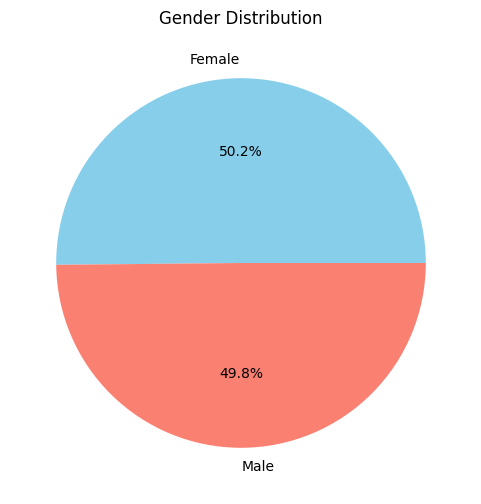

In [9]:
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Female', 'Male'], colors=['skyblue', 'salmon'])
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()


In [10]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Decision Tree
Accuracy: 0.4968454258675079
Confusion Matrix:
 [[153 174]
 [145 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49       327
           1       0.48      0.53      0.50       307

    accuracy                           0.50       634
   macro avg       0.50      0.50      0.50       634
weighted avg       0.50      0.50      0.50       634


Model: Random Forest
Accuracy: 0.5157728706624606
Confusion Matrix:
 [[175 152]
 [155 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.54      0.53       327
           1       0.50      0.50      0.50       307

    accuracy                           0.52       634
   macro avg       0.52      0.52      0.52       634
weighted avg       0.52      0.52      0.52       634


Model: KNN
Accuracy: 0.471608832807571
Confusion Matrix:
 [[148 179]
 [156 151]]
Classification Report:
       

In [13]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed and sample size
np.random.seed(42)
n_samples = 3168

# Generate synthetic dataset
df_voice = pd.DataFrame({
    'meanfreq': np.random.uniform(0.1, 0.3, n_samples),
    'sd': np.random.uniform(0.01, 0.1, n_samples),
    'median': np.random.uniform(0.1, 0.3, n_samples),
    'Q25': np.random.uniform(0.1, 0.25, n_samples),
    'Q75': np.random.uniform(0.15, 0.35, n_samples),
    'IQR': np.random.uniform(0.01, 0.2, n_samples),
    'skew': np.random.uniform(-2, 2, n_samples),
    'kurt': np.random.uniform(1, 10, n_samples),
    'sp.ent': np.random.uniform(0.5, 1.5, n_samples),
    'sfm': np.random.uniform(0.1, 0.6, n_samples),
    'mode': np.random.uniform(100, 300, n_samples),
    'centroid': np.random.uniform(100, 300, n_samples),
    'peakf': np.random.uniform(100, 300, n_samples),
    'meanfun': np.random.uniform(0.1, 0.25, n_samples),
    'minfun': np.random.uniform(0.05, 0.2, n_samples),
    'maxfun': np.random.uniform(0.15, 0.4, n_samples),
    'meandom': np.random.uniform(0.1, 0.3, n_samples),
    'mindom': np.random.uniform(0.05, 0.2, n_samples),
    'maxdom': np.random.uniform(0.2, 0.5, n_samples),
    'dfrange': np.random.uniform(0.1, 0.3, n_samples),
    'modindx': np.random.uniform(0.01, 0.1, n_samples),
    'label': np.random.choice(['male', 'female'], n_samples)
})

# Set label as category
df_voice['label'] = df_voice['label'].astype('category')


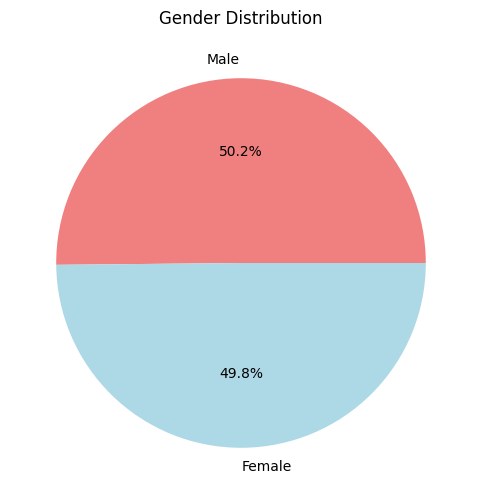

In [14]:
# Pie chart
plt.figure(figsize=(6, 6))
df_voice['label'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

C:\Users\Prakash Royal\AppData\Local\Temp\ipykernel_4652\654116137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_voice, x='label', y='meanfreq', palette='Set2')


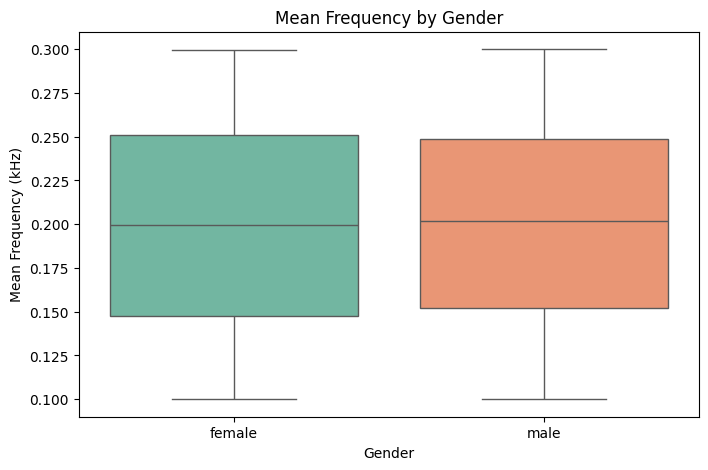

In [15]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_voice, x='label', y='meanfreq', palette='Set2')
plt.title('Mean Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Frequency (kHz)')
plt.show()

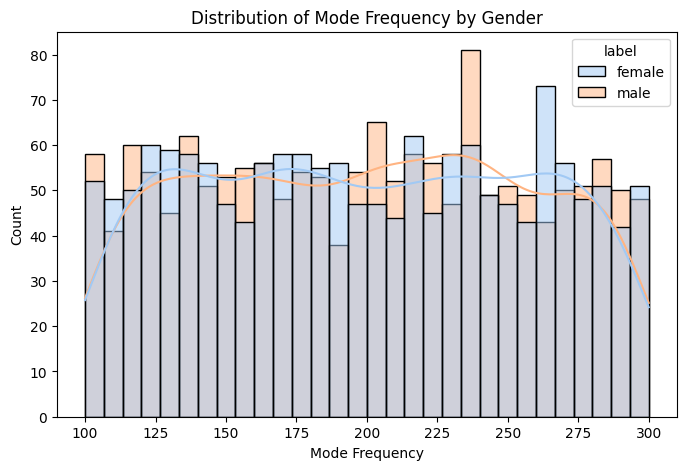

In [16]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_voice, x='mode', hue='label', bins=30, kde=True, palette='pastel')
plt.title('Distribution of Mode Frequency by Gender')
plt.xlabel('Mode Frequency')
plt.ylabel('Count')
plt.show()

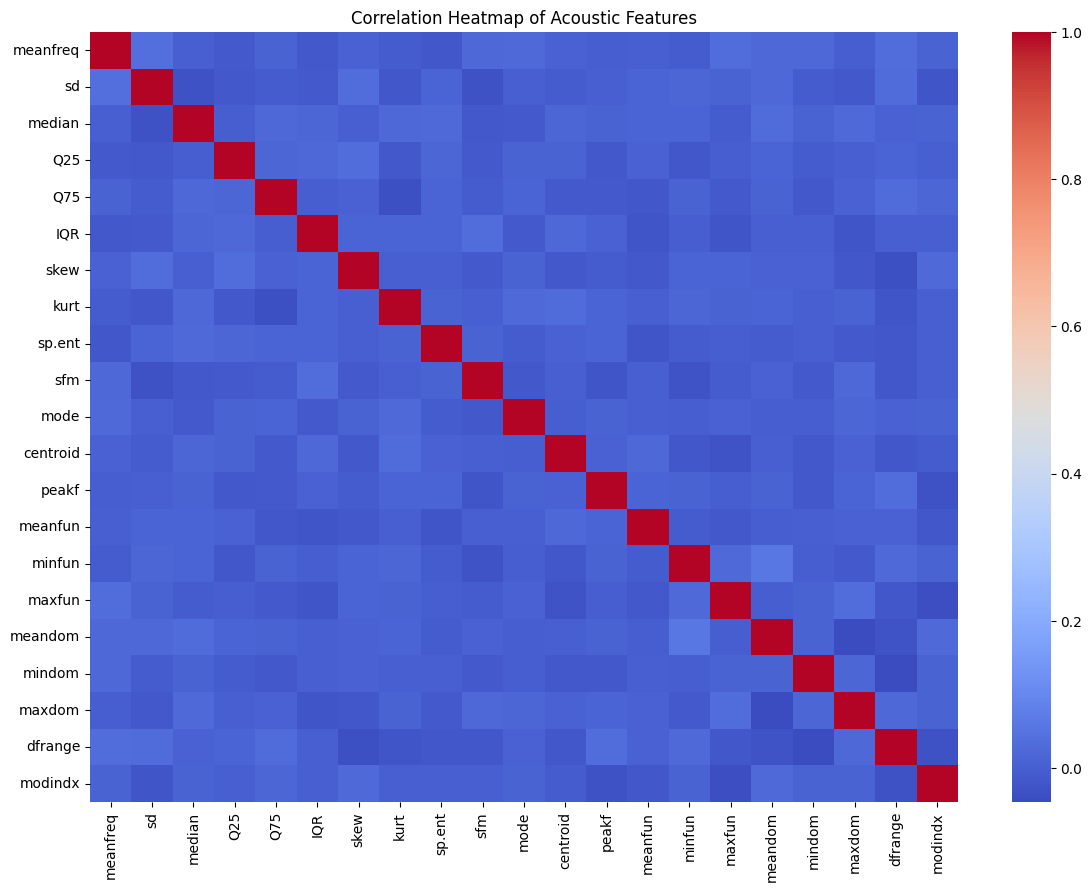

In [17]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_voice.drop('label', axis=1).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Acoustic Features')
plt.show()

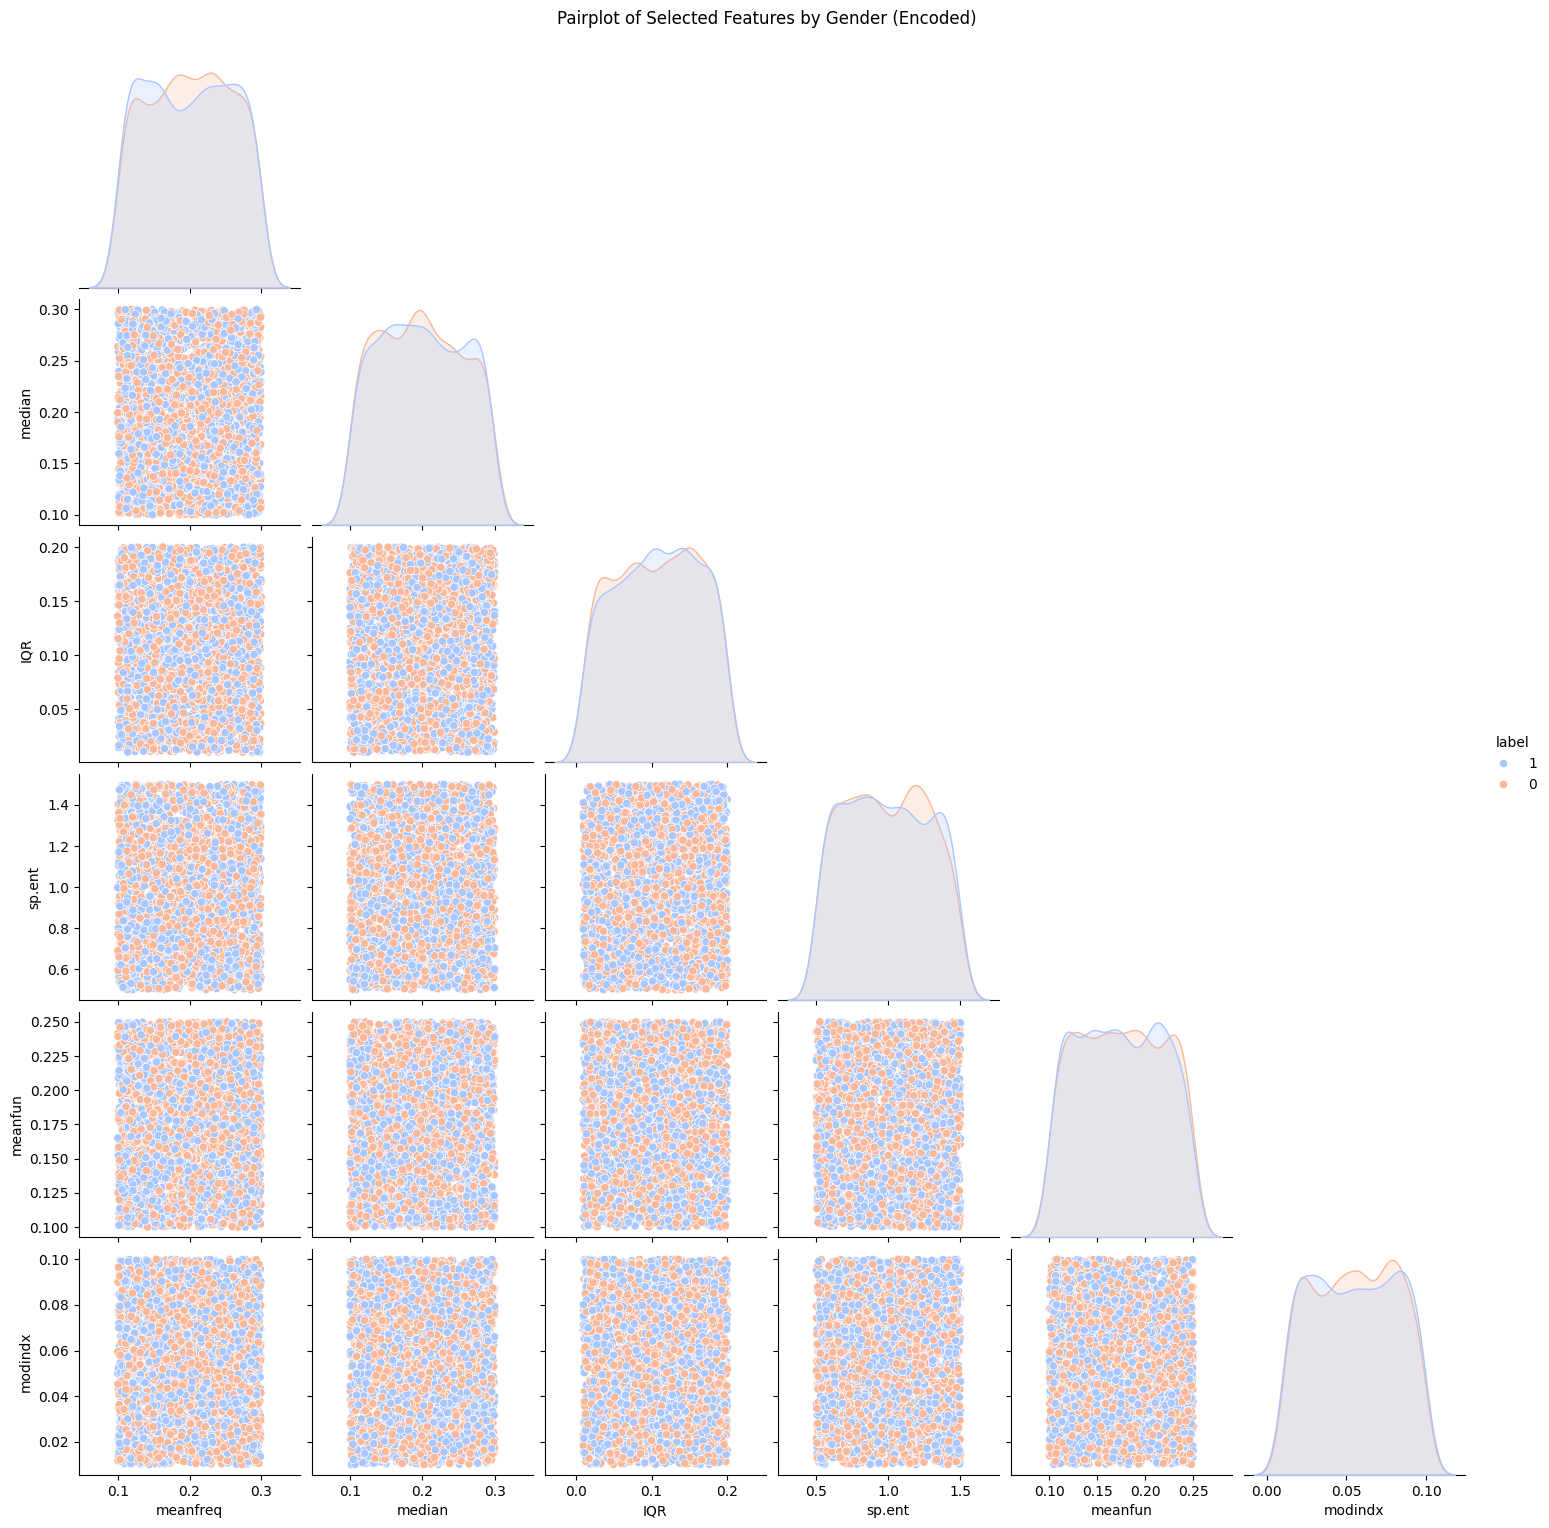

In [18]:
# Pairplot
selected_features = ['meanfreq', 'median', 'IQR', 'sp.ent', 'meanfun', 'modindx']
df_pairplot = df_voice[selected_features].copy()
df_pairplot['label'] = df_voice['label'].map({'male': 0, 'female': 1})

sns.pairplot(df_pairplot, hue='label', palette='coolwarm', corner=True)
plt.suptitle('Pairplot of Selected Features by Gender (Encoded)', y=1.02)
plt.show()

In [21]:
# Import metrics if not already imported
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize result list
results = []

# Populate table based on previous predictions
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Misclassification %': (y_test != y_pred).mean() * 100
    })

# Create and display DataFrame
df_comparison = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nModel Comparison Table:")
print(df_comparison.to_string(index=False))



Model Comparison Table:
              Model  Accuracy  Precision   Recall  F1 Score  Misclassification %
                SVM  0.504732   0.490463 0.586319  0.534125            49.526814
Logistic Regression  0.493691   0.480769 0.570033  0.521610            50.630915
      Decision Tree  0.492114   0.477477 0.517915  0.496875            50.788644
      Random Forest  0.488959   0.472843 0.482085  0.477419            51.104101
                KNN  0.471609   0.457576 0.491857  0.474097            52.839117
